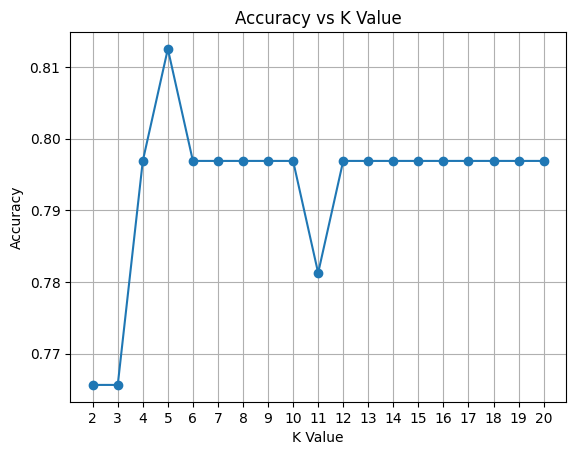

Length of k_values: 19
Length of accuracies: 19
Accuracies: [0.765625, 0.765625, 0.796875, 0.8125, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.78125, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Read the data with pandas
data = pd.read_csv("breast_cancer_survival.csv")

# Drop any rows with missing values
data.dropna(inplace=True)

# Features are all columns except the target
features = data.drop(columns=[data.columns[-1]])

# Target variable
target = data.columns[-1]

# Encode categorical variables
features_encoded = pd.get_dummies(features)

# Train KNN
X = features_encoded.values
y = data[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find accuracy for different K values[2-20], plot a graph(X-axis=K, Y-axis=accuracy)
k_values = range(2, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("Length of k_values:", len(k_values))
print("Length of accuracies:", len(accuracies))
print("Accuracies:", accuracies)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Determine unique labels in y_test
unique_labels = np.unique(y_test)

# Choose a valid label as the positive class
# Let's choose the first unique label as an example
pos_label = unique_labels[0]

# Compute precision, recall, and F1-score
precision_dt = precision_score(y_test, y_pred_dt, pos_label=pos_label)
recall_dt = recall_score(y_test, y_pred_dt, pos_label=pos_label)
f1_score_dt = f1_score(y_test, y_pred_dt, pos_label=pos_label)

# Compare both models
print("KNN Accuracy:", max(accuracies))
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-score:", f1_score_dt)

KNN Accuracy: 0.8125
Decision Tree Accuracy: 0.734375
Decision Tree Precision: 0.7833333333333333
Decision Tree Recall: 0.9215686274509803
Decision Tree F1-score: 0.8468468468468469
